In [2]:
import pandas as pd
import networkx as net
import numpy as num
from random import random,randint 
%matplotlib inline

In [27]:
n=10
k=4
world = num.zeros(n)
weights = [random()-0.5 for _ in range(n)]
print(world,'\n',weights)

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), '\n', [-0.46322122137325106, 0.19027436985705604, -0.3658322463029169, 0.23983662110705972, 0.405851867536955, -0.33953644007313566, -0.22449676576358601, 0.29054634677799673, -0.14758547246805442, -0.4899722018118918])


In [82]:
def utility(world, weights,n):
    return(sum([world[i]*weights[i] for i in range(n)]))

def utility_k(world,weights,n,k=0):
    out = 0
    for i in range(n):
        z=0
#        print("@@",i)
        for x in range(i-k, i+k):
 #           print(x)
            if x>=0 and x<n:
                z+=world[x]*weights[x]
            if x<0:
 #               print(x,'>>>', n+x)
                z+=world[n+x]*weights[n+x]

            if x>n:
                z+=world[x-n]*weights[x-n]
 #               print(x,'<<<', x-n)
        out+=z
    return out

In [37]:
utility_k(world,weights,len(world),k=4)

9.01207364223254

In [133]:
def step(world,temperature=0):

    w2=world.copy()
    if not temperature:
        i=randint(0,len(world)-1)
        if world[i]:
            w2[i]=0
        else:
            w2[i]=1
    else:
        for _ in range(int(temperature*len(world))):
            i=randint(0,len(world)-1)
            if world[i]:
                w2[i]=0
            else:
                w2[i]=1            
    return w2

def random_state(world):
    return([randint(0,1) for _ in range(len(world))])

In [131]:
def monte_carlo(world, weights, n,k):
    data = pd.DataFrame()
    for _ in range(1000):
        w= random_state(world)
        u1 = utility_k(w,weights,n,k=k)
        data=data.append({'u':u1},ignore_index=True)
        
    return(data.sort_values(by='u'))

def gradient_ascent(world, weights, n,k):
    data = pd.DataFrame()
    for _ in range(1000):
        u1 = utility_k(world,weights,n,k=k)
        u=u1
        world2 = step(world)
        u2 = utility_k(world2,weights,n,k=k)
        if u2 > u1:
            world=world2
            u=u2   
        data=data.append({'u':u},ignore_index=True)
    return(data)

def sim_annealing(world, weights, n,k, big_jumps=False):
    data = pd.DataFrame()
    temperature =1
    for _ in range(1000):
        u1 = utility_k(world,weights,n,k=k)
        u=u1
        if big_jumps:
            world2 = step(world,temperature=temperature)
        else:
            world2 = step(world)
        u2 = utility_k(world2,weights,n,k=k)
        if u2 > u1:
            world=world2
            u=u2
        elif random()<temperature:
            world=world2
            u=u2

        data=data.append({'t':temperature,'u':u},ignore_index=True)
        temperature = temperature-temperature*0.01
    return data


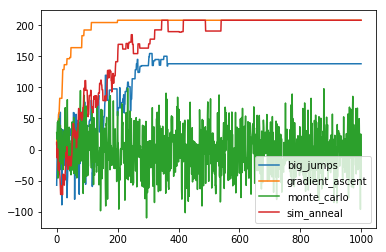

In [134]:
n=40
k=20
world = num.zeros(n)
weights = [random()-0.5 for _ in range(n)]
results = pd.DataFrame({
    'monte_carlo':monte_carlo(world,weights,n,k)['u'],
    'gradient_ascent':gradient_ascent(world, weights, n,k)['u'],
    'sim_anneal':sim_annealing(world, weights, n,k)['u'],
    'big_jumps':sim_annealing(world, weights, n,k,big_jumps=True)['u']}
)
results.plot()

In [123]:
mc=monte_carlo(world,weights,n,k)

In [127]:
mc['u1']=mc.sort_values(by='u')
mc

,u,u1
0,149.802327,149.802327
1,54.267891,54.267891
2,156.462767,156.462767
3,83.346396,83.346396
4,190.070984,190.070984
5,173.492570,173.492570
6,33.933350,33.933350
7,31.224849,31.224849
8,79.319459,79.319459
9,70.032418,70.032418
